In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
# Importing the data
train = pd.read_csv(r'C:\Users\Shubham Saurabh\Desktop\Kaggle\house-prices-advanced-regression-techniques\train.csv')
test = pd.read_csv(r'C:\Users\Shubham Saurabh\Desktop\Kaggle\house-prices-advanced-regression-techniques\test.csv')

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# checking the number of missing values
train.isnull().sum()
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [9]:
# Dealing with missing values

train.drop(['Id', 'Alley', 'Fence', 'MiscFeature', 'PoolQC'], axis=1, inplace=True)
test.drop(['Id', 'Alley', 'Fence', 'MiscFeature', 'PoolQC'], axis=1, inplace=True)

test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

test['Utilities'] = test['Utilities'].fillna('AllPub')
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])

train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())

train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])

train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])

test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())

train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])

train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])

train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])

train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])

test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

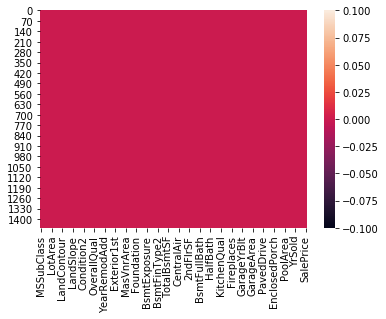

In [10]:
# Visualising if there any missing entries 

sns.heatmap(train.isnull())

In [11]:
# Splitting into training and test sets

X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:]

In [12]:
# Dealing with Categorical values

df = pd.concat([X_train, X_test], axis=0)
df.shape

df= pd.get_dummies(df, drop_first=True)

X_train = df.iloc[:1460, :]
X_test = df.iloc[1460:, :]

In [13]:
# Applying the Random Forest Regression model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
# Predicting the test result

y_pred = rf.predict(X_test)

In [15]:
# Transforming the dataframe according to the format

sample = pd.read_csv(r'C:\Users\Shubham Saurabh\Desktop\Kaggle\house-prices-advanced-regression-techniques\sample_submission.csv')
pred = pd.DataFrame(y_pred)
sample_submission = pd.concat([sample['Id'], pred], axis=1)
sample_submission.columns = ['Id', 'SalePrice']
sample_submission.head()

,Id,SalePrice
0,1461,128728.91
1,1462,157856.82
2,1463,183606.00
3,1464,183093.50
4,1465,195926.56


In [ ]:
# Converting to 'csv' format

sample_submission.to_csv('result.csv', index=False)